# A ML based Quantitative Credit Scoring Model

Team: Hongfei Ge, Sijie Hou, Shuwen Pang

In [22]:
# import modules here
import pandas as pd
import numpy as np
import seaborn as sns

In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clarence/anaconda3/lib/python3.7/site-packa

## 1. Variable Mapping 

In [2]:
data = pd.read_table("./data/Credit_data_RSM6305.txt",sep=' ')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
1,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1
2,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,NaN,A201,2
3,A14,12.0,A34,A46,2096.0,NaN,A74,2.0,A93,A101,...,A121,49.0,A143,NaN,1.0,A172,2.0,A191,A201,1
4,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1
5,A11,24.0,A33,A40,4870.0,A61,A73,3.0,NaN,A101,...,A124,53.0,A143,A153,2.0,A173,NaN,A191,A201,2


In [3]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21'],
      dtype='object')

## 2. Exploratory Data Analysis &Wranging

## 3. Variable Selection and Transformation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      969 non-null    object 
 1   V2      929 non-null    float64
 2   V3      935 non-null    object 
 3   V4      951 non-null    object 
 4   V5      973 non-null    float64
 5   V6      977 non-null    object 
 6   V7      958 non-null    object 
 7   V8      982 non-null    float64
 8   V9      926 non-null    object 
 9   V10     982 non-null    object 
 10  V11     940 non-null    float64
 11  V12     927 non-null    object 
 12  V13     978 non-null    float64
 13  V14     969 non-null    object 
 14  V15     938 non-null    object 
 15  V16     984 non-null    float64
 16  V17     994 non-null    object 
 17  V18     934 non-null    float64
 18  V19     934 non-null    object 
 19  V20     937 non-null    object 
 20  V21     1000 non-null   int64  
dtypes: float64(7), int64(1), object(13)
m

In [5]:
data['V21'].value_counts()

1    700
2    300
Name: V21, dtype: int64

In [6]:
data['target'] = data['V21'].apply(lambda x : 1 if x == 2 else 0)  # Convert to numeric
data = data.drop('V21',axis=1)

In [7]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,target
1,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,0
2,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,NaN,A201,1
3,A14,12.0,A34,A46,2096.0,NaN,A74,2.0,A93,A101,...,A121,49.0,A143,NaN,1.0,A172,2.0,A191,A201,0
4,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,0
5,A11,24.0,A33,A40,4870.0,A61,A73,3.0,NaN,A101,...,A124,53.0,A143,A153,2.0,A173,NaN,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,A14,12.0,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1.0,A191,A201,0
997,A11,NaN,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,NaN,A143,A152,1.0,A174,1.0,A192,A201,0
998,A14,12.0,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201,0
999,A11,45.0,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1.0,A192,A201,1


### 3.1 Spliting training&testing set

Before moving to the estimation phase, it is important to not use the full data for estimation. Conduct a 70:30 cross validation, which means randomly sample 70% of the data as training set and keep the rest of 30% as test set. 

In [8]:
from sklearn.model_selection import train_test_split

X = data[data.columns.difference(['target'])]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [9]:
y_train.value_counts()

0    491
1    209
Name: target, dtype: int64

In [10]:
y_test.value_counts()

0    209
1     91
Name: target, dtype: int64

### 3.2 Binning and WOE calculation

Perform binning by grouping each of the variables (new features created from the previous section and the existing ones).

**Note:**
 1. We treated NaN as a attribute under each variable binning.
 2. Binning function and woe calculation are implemented under `./src/woe.py`
 

In [11]:
from src import woe
final_iv, IV = woe.data_vars(X_train,y_train)
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,V1,A11,A11,181,87.0,0.480663,94.0,0.519337,0.416268,0.191446,0.776723,0.590031
1,V1,A12,A12,189,73.0,0.386243,116.0,0.613757,0.349282,0.236253,0.390979,0.590031
2,V1,A13,A13,41,8.0,0.195122,33.0,0.804878,0.038278,0.067210,-0.562956,0.590031
3,V1,A14,A14,267,33.0,0.123596,234.0,0.876404,0.157895,0.476578,-1.104704,0.590031
4,V1,NaN,NaN,22,8.0,0.363636,14.0,0.636364,0.038278,0.028513,0.294494,0.590031
...,...,...,...,...,...,...,...,...,...,...,...,...
87,V9,A91,A91,28,9.0,0.321429,19.0,0.678571,0.043062,0.038697,0.106895,0.045466
88,V9,A92,A92,208,76.0,0.365385,132.0,0.634615,0.363636,0.268839,0.302041,0.045466
89,V9,A93,A93,355,96.0,0.270423,259.0,0.729577,0.459330,0.527495,-0.138370,0.045466
90,V9,A94,A94,60,16.0,0.266667,44.0,0.733333,0.076555,0.089613,-0.157491,0.045466


In [12]:
# check the detials about woe here
??woe

In [13]:
IV.sort_values('IV')

,VAR_NAME,IV
9,V18,0.001337
2,V11,0.019443
18,V8,0.024541
15,V5,0.034552
10,V19,0.049794
1,V10,0.060289
7,V16,0.069226
5,V14,0.109044
12,V20,0.170341
8,V17,0.176723


### 3.3 WOE trasformation

Drop all the variables with an information value less than 0.02. This way, you can come up with a final set of variables for estimation. 

- Due to the IV values of `V18` and `V11` are lower lower than 0.02, we remove them from our dataset.

In [14]:
transform_vars_list = list((IV[IV.IV>=0.02]).VAR_NAME)
transform_prefix = 'woe_'

In [15]:
X_train_woe = woe.woe_transform(X_train,transform_vars_list,final_iv)

In [16]:
X_train_woe

,woe_V1,woe_V10,woe_V12,woe_V13,woe_V14,woe_V15,woe_V16,woe_V17,woe_V19,woe_V2,woe_V20,woe_V3,woe_V4,woe_V5,woe_V6,woe_V7,woe_V8,woe_V9
542,-1.104704,-0.00088,0.640536,-0.471560,-0.079747,0.713031,-0.174474,-0.033653,-0.143698,-0.110971,0.044891,-0.559583,0.485202,-0.097345,0.251114,-0.422184,0.087535,-0.138370
441,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,0.082631,0.186938,-0.143698,-0.311397,0.044891,0.205813,0.485202,-0.097345,0.251114,-0.422184,0.087535,-0.271901
483,0.776723,-0.00088,0.071351,-0.471560,-0.079747,0.387087,-0.174474,-0.033653,0.302041,0.625268,0.044891,0.205813,-0.130744,0.071618,-1.193583,-0.422184,0.087535,0.302041
423,0.294494,-0.00088,-0.592809,-0.471560,-0.079747,-0.216332,-0.174474,-0.152129,0.055602,-0.311397,0.044891,-0.868657,0.485202,-0.097345,0.251114,-0.103730,-0.089796,-0.138370
779,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,-0.174474,0.186938,-0.143698,0.625268,0.044891,-0.868657,-0.668317,0.071618,-1.193583,-0.422184,0.087535,-0.138370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,-1.104704,-0.00088,0.640536,-0.244502,0.377186,-0.090352,-0.174474,0.186938,-0.143698,-0.126719,0.044891,0.979273,0.485202,0.071618,0.251114,0.671788,-0.089796,-0.138370
271,-1.104704,-0.00088,0.071351,0.151207,-0.079747,-0.216332,0.082631,-0.033653,0.302041,-0.126719,-1.543785,0.205813,0.485202,0.071618,-0.445173,-0.103730,0.087535,-0.138370
861,-1.104704,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,-0.174474,-0.033653,0.055602,-0.110971,0.044891,-0.559583,-0.668317,0.071618,-1.193583,-0.040407,0.087535,-0.138370
436,0.390979,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,0.082631,-0.033653,-0.143698,-0.311397,0.044891,0.205813,-0.579651,-0.097345,-0.445173,-0.040407,-0.089796,-0.157491


### 3.4 Correlation matrix of the of all the variables

<AxesSubplot:>

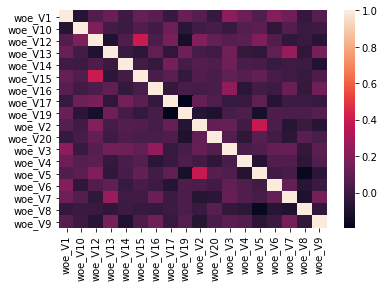

In [23]:
sns.heatmap(X_train_woe.corr())

From the correlation matrix, it shows that most of the variables we selected are independent. Only 2 pairs appears to be correlated:

1. `V2` (Duration) and `V5` (credit amount)

2. `V12` (qualitative) and `V15` (housing)

## 4. Estimation

In [18]:
X_train_woe

,woe_V1,woe_V10,woe_V12,woe_V13,woe_V14,woe_V15,woe_V16,woe_V17,woe_V19,woe_V2,woe_V20,woe_V3,woe_V4,woe_V5,woe_V6,woe_V7,woe_V8,woe_V9
542,-1.104704,-0.00088,0.640536,-0.471560,-0.079747,0.713031,-0.174474,-0.033653,-0.143698,-0.110971,0.044891,-0.559583,0.485202,-0.097345,0.251114,-0.422184,0.087535,-0.138370
441,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,0.082631,0.186938,-0.143698,-0.311397,0.044891,0.205813,0.485202,-0.097345,0.251114,-0.422184,0.087535,-0.271901
483,0.776723,-0.00088,0.071351,-0.471560,-0.079747,0.387087,-0.174474,-0.033653,0.302041,0.625268,0.044891,0.205813,-0.130744,0.071618,-1.193583,-0.422184,0.087535,0.302041
423,0.294494,-0.00088,-0.592809,-0.471560,-0.079747,-0.216332,-0.174474,-0.152129,0.055602,-0.311397,0.044891,-0.868657,0.485202,-0.097345,0.251114,-0.103730,-0.089796,-0.138370
779,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,-0.174474,0.186938,-0.143698,0.625268,0.044891,-0.868657,-0.668317,0.071618,-1.193583,-0.422184,0.087535,-0.138370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,-1.104704,-0.00088,0.640536,-0.244502,0.377186,-0.090352,-0.174474,0.186938,-0.143698,-0.126719,0.044891,0.979273,0.485202,0.071618,0.251114,0.671788,-0.089796,-0.138370
271,-1.104704,-0.00088,0.071351,0.151207,-0.079747,-0.216332,0.082631,-0.033653,0.302041,-0.126719,-1.543785,0.205813,0.485202,0.071618,-0.445173,-0.103730,0.087535,-0.138370
861,-1.104704,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,-0.174474,-0.033653,0.055602,-0.110971,0.044891,-0.559583,-0.668317,0.071618,-1.193583,-0.040407,0.087535,-0.138370
436,0.390979,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,0.082631,-0.033653,-0.143698,-0.311397,0.044891,0.205813,-0.579651,-0.097345,-0.445173,-0.040407,-0.089796,-0.157491


In [19]:
y_train

542    0
441    0
483    0
423    0
779    0
      ..
107    1
271    0
861    0
436    1
103    0
Name: target, Length: 700, dtype: int64

## 5. Performance Validation

In [20]:
# out of sample inputs woe transform
X_test_woe = woe.woe_transform(X_test,transform_vars_list,final_iv)

In [21]:
X_test_woe

,woe_V1,woe_V10,woe_V12,woe_V13,woe_V14,woe_V15,woe_V16,woe_V17,woe_V19,woe_V2,woe_V20,woe_V3,woe_V4,woe_V5,woe_V6,woe_V7,woe_V8,woe_V9
522,0.776723,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,0.082631,-0.033653,0.055602,-0.126719,0.044891,-0.559583,-0.579651,0.071618,0.251114,-0.040407,-0.089796,0.302041
738,0.776723,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,0.082631,-0.152129,-0.143698,-0.126719,0.044891,0.205813,0.485202,0.071618,0.225501,-0.040407,-0.089796,-0.138370
741,0.776723,-0.00088,0.049737,0.151207,0.377186,-0.216332,0.082631,-0.033653,0.055602,-0.110971,0.044891,0.979273,0.485202,-0.097345,0.225501,-0.103730,-0.089796,-0.138370
661,-0.562956,-0.00088,-0.592809,0.431695,-0.079747,0.387087,0.082631,-0.033653,0.055602,-0.311397,0.044891,0.205813,-0.579651,-0.097345,0.251114,-0.040407,-0.089796,-0.157491
412,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.090352,-0.174474,0.186938,-0.143698,0.625268,0.044891,-0.868657,-0.668317,0.071618,0.251114,-0.103730,-0.089796,-0.138370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,-1.104704,-0.00088,0.049737,0.431695,-0.079747,-0.216332,-0.174474,-0.033653,-0.143698,0.625268,0.044891,0.006812,0.394578,0.071618,0.251114,-0.040407,-0.089796,-0.271901
936,0.390979,-0.00088,0.640536,0.151207,0.218121,-0.216332,-0.174474,0.186938,0.055602,0.625268,0.044891,0.006812,-0.579651,0.402125,0.225501,0.338644,0.087535,-0.138370
429,-1.104704,-0.00088,0.049737,0.431695,-0.079747,-0.216332,0.082631,-0.033653,0.055602,-0.311397,0.044891,0.205813,-0.130744,-0.097345,0.251114,-0.422184,-0.089796,-0.138370
8,0.390979,-0.00088,0.049737,-0.244502,-0.079747,0.387087,0.082631,0.186938,-0.143698,0.625268,0.044891,0.205813,-0.668317,0.071618,0.251114,-0.040407,-0.089796,-0.138370


### 5.1 predict out-of-sample default probability for each method

### 5.2 Brier score 
- https://en.wikipedia.org/wiki/Brier_score 

### 5.3 Hosmer – Lemeshow Test

[A good primer](http://thestatsgeek.com/2014/02/16/the-hosmer-lemeshow-goodness-of-fit-test-for-logistic-regression/)

### 5.4 ROC curve, AUC

### 5.5 Final Recommendation